# __Multiple files with `pandas`__

In [210]:
import numpy as np
import pandas as pd
import matplotlib

## __Merge Practice__

In [211]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [212]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


### __Inner Merge Practice__

In [213]:
#inner_merged_df = pd.concat([a_df,b_df],join = 'outer', axis=1).fillna(0)
#inner_merged_df

In [214]:
inner_merged_df = a_df.merge(b_df, how='inner')
inner_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916


#### Check your code

In [215]:
from nbresult import ChallengeResult
result = ChallengeResult('inner_merge',
    inner_merged_shape=inner_merged_df.shape,
    inner_merged_nulls=sum(inner_merged_df.isnull().sum())
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 2 items

test_inner_merge.py::TestInnerMerge::test_inner_merged_nulls PASSED      [ 50%]
test_inner_merge.py::TestInnerMerge::test_inner_merged_shape PASSED      [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/inner_merge.pickle

git commit -m 'Completed inner_merge step'

git push origin master



---
We just performed an __inner__ merge, meaning that we __only__ kept the rows that had a value in the Column we merged on that exists in `botha_df` and `b_df`.

<br>
<center><img src="images/inner_ex.png"/></center>


In our example, the `a_df` has a line about `Finland` but `b_df` does not, so this row is not included in the inner merge. Same thing for `Canada`, it’s present in `b_df` but not in `a_df` so it’s not present in the inner merge.



### __Left Merge__

There are four possible merges, the previous section covered the inner merge. Let’s try to do the __left__ merge:

<center><img src="images/left_merge.png"/></center>

#### Left Merge Practice

In [216]:
left_merged_df = a_df.merge(b_df, how='left')
left_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN


#### Check your code

In [217]:
from nbresult import ChallengeResult
result = ChallengeResult('left_merge',
    left_merged_shape=left_merged_df.shape,
    left_merged_nulls=sum(left_merged_df.isnull().sum())
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 2 items

test_left_merge.py::TestLeftMerge::test_left_merged_df_shape PASSED      [ 50%]
test_left_merge.py::TestLeftMerge::test_left_merged_nulls PASSED         [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/left_merge.pickle

git commit -m 'Completed left_merge step'

git push origin master



### __Right Merge__

You probably get where we are going now. We just did a left merge, so now let’s have a look at the __right__ merge!

<br>
<center><img src="images/right_merge.png"/></center>


#### Right Merge Practice

In [218]:
right_merged_df = a_df.merge(b_df, how='right')
right_merged_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Canada,NaN,NaN,0.926


#### Check your code

In [219]:
from nbresult import ChallengeResult
result = ChallengeResult('right_merge',
    right_merged_shape=right_merged_df.shape,
    right_merged_nulls=sum(right_merged_df.isnull().sum())
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 2 items

test_right_merge.py::TestRightMerge::test_right_merged_df_shape PASSED   [ 50%]
test_right_merge.py::TestRightMerge::test_right_merged_nulls PASSED      [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/right_merge.pickle

git commit -m 'Completed right_merge step'

git push origin master



### __Outer Merge__

Finally, there is a merge which will keep __all__ the rows from both `a_df` and `b_df`, the __outer__ merge.

<br>
<center><img src="images/outer_merge.png"/></center>

#### Outer Merge Practice

In [220]:
outer_merged_df = a_df.merge(b_df, how='outer')
outer_merged_df

,Country,Population (M),Capital,HDI
0,Belgium,11.4,Brussels,0.916
1,Canada,NaN,NaN,0.926
2,Finland,5.5,Helsinki,NaN
3,France,67.2,Paris,0.901
4,Germany,82.8,Berlin,0.936


#### Check your code

In [221]:
from nbresult import ChallengeResult
result = ChallengeResult('outer_merge',
    outer_merged_shape=outer_merged_df.shape,
    outer_merged_nulls=sum(outer_merged_df.isnull().sum())
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 2 items

test_outer_merge.py::TestOuterMerge::test_outer_merged_df_shape PASSED   [ 50%]
test_outer_merge.py::TestOuterMerge::test_outer_merged_nulls PASSED      [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/outer_merge.pickle

git commit -m 'Completed outer_merge step'

git push origin master



ℹ Pandas has a whole article in the documentation about [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html). Again it’s a pretty long article that you don’t need to read now, but keep it in mind next time you are exploring a Dataset with a lot of <span style="color:#FF6969">Nan</span>.

## __Join Practice__

The merge function was useful to merge based on a given __column__. We will now see another use case where you want to merge based on the __index__ (the rows).

In [222]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [223]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [224]:
#aa_df.join(bb_df)
#aa_df.join(bb_df, how='inner')
#aa_df.join(bb_df, how='right')
aa_df.join(bb_df, how='outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


You can use `.merge()` when you want to merge based on a given __column__ and `.join()` when you want to join on the __index__.

## __Concat Practice__


There’s a third way to put two dataframes together, using `pandas.concat()`. Let’s jump right into it:

In [225]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


This method is a bit more “dumb”, it just combines the two dataframes into one by __stacking__ their rows. This might prove useful in some situations though, so it’s worth to know how to use it.

## __Olympic Sports and Medals, 1896-2014__

### __Loading data from multiple CSVs__

In [226]:
countries_df = pd.read_csv('data/dictionary.csv', decimal=',')
countries_df['Population'] = countries_df['Population'].astype('float')
countries_df['GDP per Capita'] = countries_df['GDP per Capita'].astype('float')
countries_df.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [227]:
summer_df = pd.read_csv('data/summer.csv', decimal=',').rename(columns={'Country':'Code'})
summer_df.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [228]:
winter_df = pd.read_csv('data/winter.csv', decimal=',').rename(columns={'Country':'Code'})
winter_df.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze


### __Combining The Data__

Time to perform a merge of `countries_df` and `summer_df` (into a new dataframe `summer_countries_df`). As we’ll want to merge all games into one DataFrame at the end, __add a__ <span style="color:#FF6969">Season</span> column to the `summer_countries_df`.

In [229]:
summer_countries_df = countries_df.merge(summer_df, how="inner")
summer_countries_df.head(2)
# usar `assign` o `insert` para añadir nuevas columnas

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Afghanistan,AFG,32526562.0,594.323081,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze
1,Afghanistan,AFG,32526562.0,594.323081,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze


In [230]:
summer_countries_df.insert(12, 'Season','Summer')

In [231]:
summer_countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25742 entries, 0 to 25741
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         25742 non-null  object 
 1   Code            25742 non-null  object 
 2   Population      25696 non-null  float64
 3   GDP per Capita  25142 non-null  float64
 4   Year            25742 non-null  int64  
 5   City            25742 non-null  object 
 6   Sport           25742 non-null  object 
 7   Discipline      25742 non-null  object 
 8   Athlete         25742 non-null  object 
 9   Gender          25742 non-null  object 
 10  Event           25742 non-null  object 
 11  Medal           25742 non-null  object 
 12  Season          25742 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.6+ MB


In [232]:
winter_countries_df = countries_df.merge(winter_df, how="inner")
winter_countries_df.head(2)

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal
0,Australia,AUS,23781169.0,56310.962993,1994,Lillehammer,Skating,Short Track Speed Skating,"BRADBURY, Steven",Men,5000M Relay,Bronze
1,Australia,AUS,23781169.0,56310.962993,1994,Lillehammer,Skating,Short Track Speed Skating,"HANSEN, Kieran",Men,5000M Relay,Bronze


In [233]:
winter_countries_df.insert(12, 'Season','Winter')

In [234]:
winter_countries_df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         4826 non-null   object 
 1   Code            4826 non-null   object 
 2   Population      4826 non-null   float64
 3   GDP per Capita  4815 non-null   float64
 4   Year            4826 non-null   int64  
 5   City            4826 non-null   object 
 6   Sport           4826 non-null   object 
 7   Discipline      4826 non-null   object 
 8   Athlete         4826 non-null   object 
 9   Gender          4826 non-null   object 
 10  Event           4826 non-null   object 
 11  Medal           4826 non-null   object 
 12  Season          4826 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 490.3+ KB


Now we can concatenate `summer_countries_df` and `winter_countries_df` (they have the same columns!) into an `all_df` DataFrame.

In [235]:
all_df = pd.concat([summer_countries_df , winter_countries_df], axis = 0, join = 'inner')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30568 entries, 0 to 4825
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         30568 non-null  object 
 1   Code            30568 non-null  object 
 2   Population      30522 non-null  float64
 3   GDP per Capita  29957 non-null  float64
 4   Year            30568 non-null  int64  
 5   City            30568 non-null  object 
 6   Sport           30568 non-null  object 
 7   Discipline      30568 non-null  object 
 8   Athlete         30568 non-null  object 
 9   Gender          30568 non-null  object 
 10  Event           30568 non-null  object 
 11  Medal           30568 non-null  object 
 12  Season          30568 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.3+ MB


#### Check your code

In [236]:
from nbresult import ChallengeResult
result = ChallengeResult('all_df',
    all_df_shape=all_df.shape,
    all_df_columns=set(all_df.columns)
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 2 items

test_all_df.py::TestAllDf::test_all_df_columns PASSED                    [ 50%]
test_all_df.py::TestAllDf::test_all_df_shape PASSED                      [100%]

============================== 2 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/all_df.pickle

git commit -m 'Completed all_df step'

git push origin master



### __Top Countries Analysis__

#### __Top 10 Countries since 1984__

Use boolean indexing, grouping & sorting to create a new dataframe consisting of the Top 10 countries who won the most __total__ medals since _1984_.
<br>
<ul>
  <li>Save it in a variable named <span style="color:#FF6969">top_10_df</span></li>
  <li>The dataframe should consist of ten rows and one column named <span style="color:#FF6969">Medal Count</span></li>
</ul>

In [237]:
year_since_1984 = all_df[all_df['Year'] >= 1984]

In [238]:
year_grouping = year_since_1984.groupby(by = ['Country'])

In [239]:
count_medals = year_grouping[['Medal']].count()
top_10_df = count_medals.sort_values(by=['Medal'], ascending = False).head(10)


In [240]:
top_10_df = top_10_df.rename(columns={'Medal': 'Medal Count'})
top_10_df

,Medal Count
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


To plot the result with a barchart you can do:

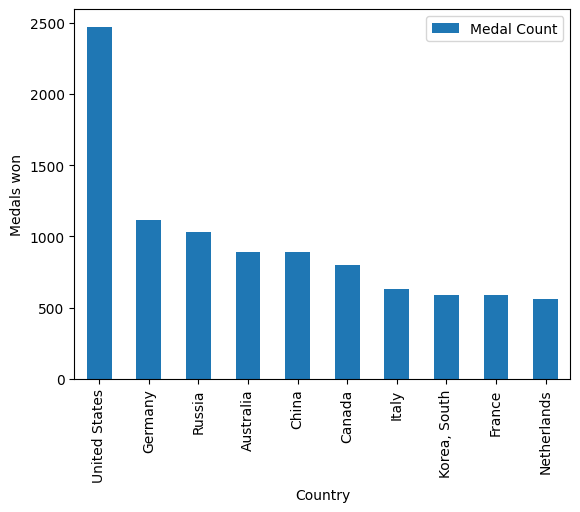

In [241]:
plot = top_10_df.plot(kind="bar")
plot.set_xlabel("Country");
plot.set_ylabel("Medals won");

##### Check your code

In [242]:
from nbresult import ChallengeResult
result = ChallengeResult('olympic_games',
    top_country_1=top_10_df.iloc[0]['Medal Count'],
    top_country_10=top_10_df.iloc[9]['Medal Count']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 1 item

test_olympic_games.py::TestOlympicGames::test_top_10_countries_medals PASSED [100%]

============================== 1 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/olympic_games.pickle

git commit -m 'Completed olympic_games step'

git push origin master



#### __Top 10 Countries (by Season) since 1984__

Let’s take the analysis one step further, this time we don’t just want to count the total number of medals for each country, we want to count the number of medals for Winter Games on the one hand, and for Summer Games on the other hand. Then we want to plot them (sorting should still be based on the total number of medals).
<br>
<ul>
  <li>The dataframe should be saved as a variable called <span style="color:#FF6969">top_10_season_df</span></li>
  <li>The dataframe should have 10 rows and 3 columns named <span style="color:#FF6969">Summer Winter Total</span></li>
</ul>

In [243]:
grouping_seaon_country = year_since_1984.groupby(by = ['Country','Season'])

In [244]:
grouping_seaon_country[['Medal']].count()

,,Medal
Country,Season,
Afghanistan,Summer,2
Algeria,Summer,15
Argentina,Summer,173
Armenia,Summer,11
Australia,Summer,876
...,...,...
Venezuela,Summer,7
Vietnam,Summer,2
Virgin Islands*,Summer,1


In [245]:
count_medals_2 = grouping_seaon_country[['Medal']].count()
top_season = count_medals_2.unstack(level=-1).fillna(0)

In [246]:
top_season.columns = top_season.columns.droplevel()

'''Este código eliminará el primer nivel del índice de las columnas
# (en este caso, 'Medal'), dejando solo ‘Summer’ y ‘Winter’. Recuerda
# que este cambio se realiza “in-place”, lo que significa que modificará
# directamente tu DataFrame original. Si deseas conservar el DataFrame
# original sin cambios, puedes crear una copia antes de realizar esta operación.'''

"Este código eliminará el primer nivel del índice de las columnas\n# (en este caso, 'Medal'), dejando solo ‘Summer’ y ‘Winter’. Recuerda\n# que este cambio se realiza “in-place”, lo que significa que modificará\n# directamente tu DataFrame original. Si deseas conservar el DataFrame\n# original sin cambios, puedes crear una copia antes de realizar esta operación."

In [247]:
top_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Summer  123 non-null    float64
 1   Winter  123 non-null    float64
dtypes: float64(2)
memory usage: 2.9+ KB


In [248]:
top_season['Total'] = top_season.sum(axis=1)

In [249]:
top_10_season_df = top_season.sort_values(by=['Total']\
    , ascending=False).head(10).astype(int)

In [250]:
top_10_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, United States to Netherlands
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Summer  10 non-null     int64
 1   Winter  10 non-null     int64
 2   Total   10 non-null     int64
dtypes: int64(3)
memory usage: 320.0+ bytes


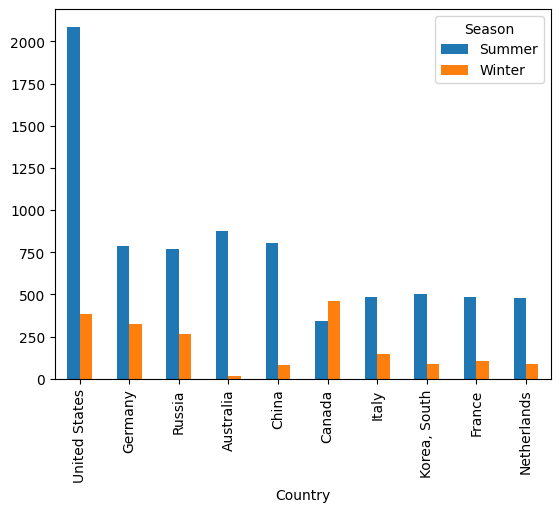

In [251]:
top_10_season_df[['Summer', 'Winter']].plot(kind="bar");

##### Check your code

In [252]:
from nbresult import ChallengeResult
result = ChallengeResult('olympic_games_season',
    top_country_season_shape=top_10_season_df.shape,
    top_country_1_summer=top_10_season_df.iloc[0]['Summer'],
    top_country_10_winter=top_10_season_df.iloc[9]['Winter']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 3 items

test_olympic_games_season.py::TestOlympicGamesSeason::test_top_10_countries_shape PASSED [ 33%]
test_olympic_games_season.py::TestOlympicGamesSeason::test_top_10_countries_summer PASSED [ 66%]
test_olympic_games_season.py::TestOlympicGamesSeason::test_top_10_countries_winter PASSED [100%]

============================== 3 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/olympic_games_season.pickle

git commit -m 'Completed olympic_games_season step'

git push origin master



#### __Optional - Top 10 Countries event wins since 1984__

If you are a big fan of the olympics you may have noticed that the medal counts don’t look quite right. Add a new cell into your notebooks and run the following:

##### Table

In [253]:
all_df[(all_df.Year==2008) & (all_df.Event=='Basketball') & (all_df.Medal=='Gold')]
# como un sort. Tambien se puede usar query

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
25188,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"ANTHONY, Carmelo",Men,Basketball,Gold,Summer
25189,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"BOOZER, Carlos",Men,Basketball,Gold,Summer
25190,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"BOSH, Chris",Men,Basketball,Gold,Summer
25191,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"BRYANT, Kobe",Men,Basketball,Gold,Summer
25192,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"HOWARD, Dwight",Men,Basketball,Gold,Summer
25193,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"JAMES, Lebron",Men,Basketball,Gold,Summer
25194,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"KIDD, Jason",Men,Basketball,Gold,Summer
25195,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"PAUL, Chris",Men,Basketball,Gold,Summer
25196,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"PRINCE, Tayshaun",Men,Basketball,Gold,Summer
25197,United States,USA,321418820.0,56115.718426,2008,Beijing,Basketball,Basketball,"REDD, Michael",Men,Basketball,Gold,Summer


##### Content

It looks like team sports are being overcounted in our analysis. How can we remove the additional rows for team sports?
<br>
Create a new dataframe showing the top ten countries by total __event__ wins since 1984.
<br>
<ul>
  <li>assign the new dataframe to a variable named <span style="color:#FF6969">top_10_events_df</span></li>
  <li>The dataframe should have 10 rows and 1 column called <span style="color:#FF6969">Event Count</span></li>
</ul>

In [493]:
remove_list = year_since_1984.drop(columns=['Code','Population','GDP per Capita','City'])
remove_list.head(3)

,Country,Year,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,2008,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,2012,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,1984,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer


In [531]:
year_ath = remove_list.drop_duplicates(subset=['Athlete'])
#remove_value = year_ath[(year_ath.Medal!='Bronze')]
year_ath.head(3)

,Country,Year,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,2008,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
2,Algeria,1984,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,1984,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer


In [532]:
year_grouping = year_ath.groupby(by = ['Country'])
count_event = year_grouping[['Event']].count()
top_10_events = count_event.sort_values(by=['Event'], ascending=False).head(10)
top_10_events_df = top_10_events.rename(columns = {'Event':'Event Count'})

In [533]:
top_10_events_df

,Event Count
Country,
United States,1651
Russia,748
Germany,704
China,602
Australia,592
Canada,583
"Korea, South",452
France,438
Italy,414


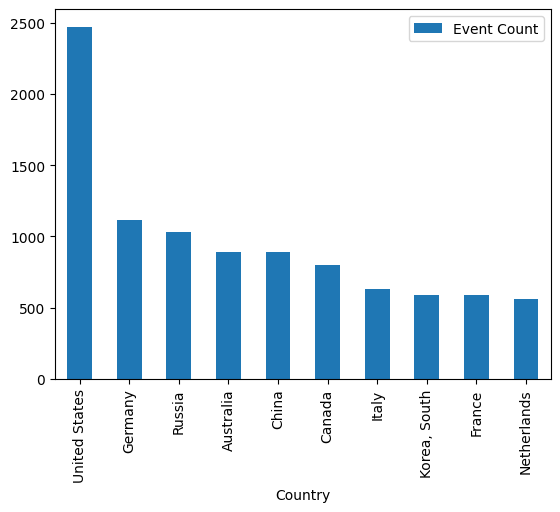

In [428]:
top_10_events_df.plot(kind='bar');

##### Check your code

In [276]:
from nbresult import ChallengeResult
result = ChallengeResult('olympic_games_event',
    top_country_event_shape=top_10_events_df.shape,
    top_country_1_event=top_10_events_df.iloc[0]['Event Count'],
    top_country_10_event=top_10_events_df.iloc[9]['Event Count']
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.2, pytest-8.1.1, pluggy-1.4.0 -- /home/diegomera/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diegomera/code/diegomera95/dotfiles/Lewagon courses/Pre-selection course/Data Analysis/04-Multiple-Files-With-Pandas/tests
plugins: anyio-4.3.0
collecting ... collected 3 items

test_olympic_games_event.py::TestOlympicGamesEvent::test_top_10_events_shape PASSED [ 33%]
test_olympic_games_event.py::TestOlympicGamesEvent::test_top_events_1 FAILED [ 66%]
test_olympic_games_event.py::TestOlympicGamesEvent::test_top_events_10 FAILED [100%]

=================================== FAILURES ===================================
___________________ TestOlympicGamesEvent.test_top_events_1 ____________________

self = <test_olympic_games_event.TestOlympicGamesEvent testMethod=test_top_events_1>

    def test_top_events_1(self):
>       self.assertEqual(self.result.top_co